# Overview

_Covid-19 or Corona virus, it is with no doubt the worst pandemic happened in the year 2020, currently affecting countries worldwide. This virus can cause a serious respiratory infections which can damage the lungs, with symptoms of high fever, dry cough and tiredness._

_Many research analysis have been done about this topic, due to the economic crisis unleashed by the outbreak of COVID-19. In this report, we are going to study the Corona data cases in the Arabic world, we are going to present the analytical issues by investigating the results of ANOVA test and the correlation between deaths and cases._

_As we know, the Arab gulf countries are : Bahrain(BH), Kuwait(KW), Oman(OM), Qatar(QA), Saudi Arabia(SA) and the United Arab Emirates(AE)_

In [2]:
#importing all the required libraries and data:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import scipy.stats as stats
import os
import random
import statsmodels.api as sm
import statsmodels.stats.multicomp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import plotly.express as px


In [48]:
# Load data from the directory:
COVID19= pd.read_excel('data.xlsx')

## Exploratory Data Analysis

In [49]:
COVID19.tail() 
#From the above code snippet, we can see that there’re a few states that have 0 or no corona cases in a day.

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
60404,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
60405,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
60406,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
60407,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
60408,2020-03-21,21,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


We can note that geoId coulmn refer to country code, for that reason we rename the column name to country_code.

In [50]:
COVID19.rename(columns={'geoId': 'country_code', 'countriesAndTerritories': 'country'}, inplace=True)

In [51]:
print("there are {} records , and {} columns in the collected data".format(COVID19.shape[0],COVID19.shape[1]))

there are 60409 records , and 12 columns in the collected data


In [52]:
print("The collected data represent the daily COVID19 record for {} countries, the first record is reported on {} and the last record is recorded on {}, that's  mean the collected data covers {} days".format(COVID19.country_code.nunique(),
COVID19.dateRep.min().strftime('%b %d,%Y'), 
COVID19.dateRep.max().strftime('%b %d,%Y'), (COVID19.dateRep.max() - COVID19.dateRep.min()).days))



The collected data represent the daily COVID19 record for 213 countries, the first record is reported on Dec 31,2019 and the last record is recorded on Dec 07,2020, that's  mean the collected data covers 342 days


In [53]:
# Convert date to string type
COVID19['date_s'] = COVID19.dateRep.dt.strftime('%Y%m%d')
# Sort the data frame on date
COVID19 = COVID19.sort_values(by=['date_s'])
# Preview the data frame
COVID19.head(10)

,dateRep,day,month,year,cases,deaths,country,country_code,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,date_s
27128,2019-12-31,31,12,2019,0,0,Iran,IR,IRN,82913893.0,Asia,NaN,20191231
54516,2019-12-31,31,12,2019,0,0,Thailand,TH,THA,69625581.0,Asia,NaN,20191231
41944,2019-12-31,31,12,2019,0,0,Norway,NO,NOR,5328212.0,Europe,NaN,20191231
15550,2019-12-31,31,12,2019,0,0,Denmark,DK,DNK,5806081.0,Europe,NaN,20191231
32184,2019-12-31,31,12,2019,0,0,Lebanon,LB,LBN,6855709.0,Asia,NaN,20191231
45805,2019-12-31,31,12,2019,0,0,Romania,RO,ROU,19414458.0,Europe,NaN,20191231
2603,2019-12-31,31,12,2019,0,0,Armenia,AM,ARM,2957728.0,Europe,NaN,20191231
16408,2019-12-31,31,12,2019,0,0,Dominican_Republic,DO,DOM,10738957.0,America,NaN,20191231
8144,2019-12-31,31,12,2019,0,0,Brazil,BR,BRA,211049519.0,America,NaN,20191231
26785,2019-12-31,31,12,2019,0,0,Indonesia,ID,IDN,270625567.0,Asia,NaN,20191231


In [54]:
gulf=COVID19.loc[COVID19['country_code'].isin(['BH', 'SA', 'AE','KW','QA','OM'])]   

In [58]:
gulf.tail()

,dateRep,day,month,year,cases,deaths,country,country_code,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,date_s
56648,2020-12-07,7,12,2020,1153,3,United_Arab_Emirates,AE,ARE,9770526.0,Asia,178.485785,20201207
45126,2020-12-07,7,12,2020,125,0,Qatar,QA,QAT,2832071.0,Asia,94.595086,20201207
47786,2020-12-07,7,12,2020,187,11,Saudi_Arabia,SA,SAU,34268529.0,Asia,10.082137,20201207
4151,2020-12-07,7,12,2020,198,0,Bahrain,BH,BHR,1641164.0,Asia,135.574507,20201207
41945,2020-12-07,7,12,2020,557,9,Oman,OM,OMN,4974992.0,Asia,56.382000,20201207


In [63]:
fig = px.scatter_geo(
    gulf, 
    locations='countryterritoryCode',
    hover_name='country',
    size='cases',
    projection="natural earth",
    title=f'World COVID-19 daily new cases',
    animation_frame="date_s"
)
fig.show()

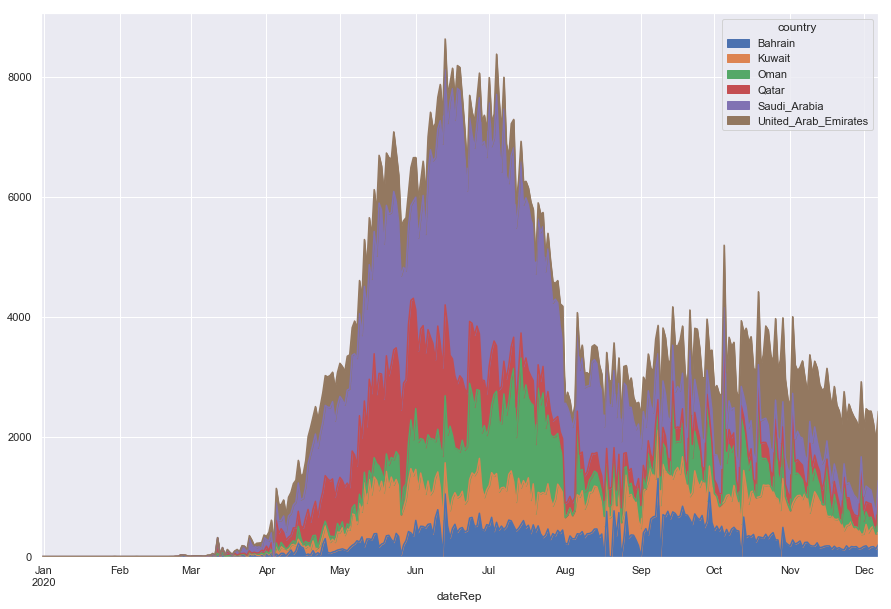

In [76]:
gulf.pivot("dateRep", "country", "cases").plot.area(figsize=(15,10));

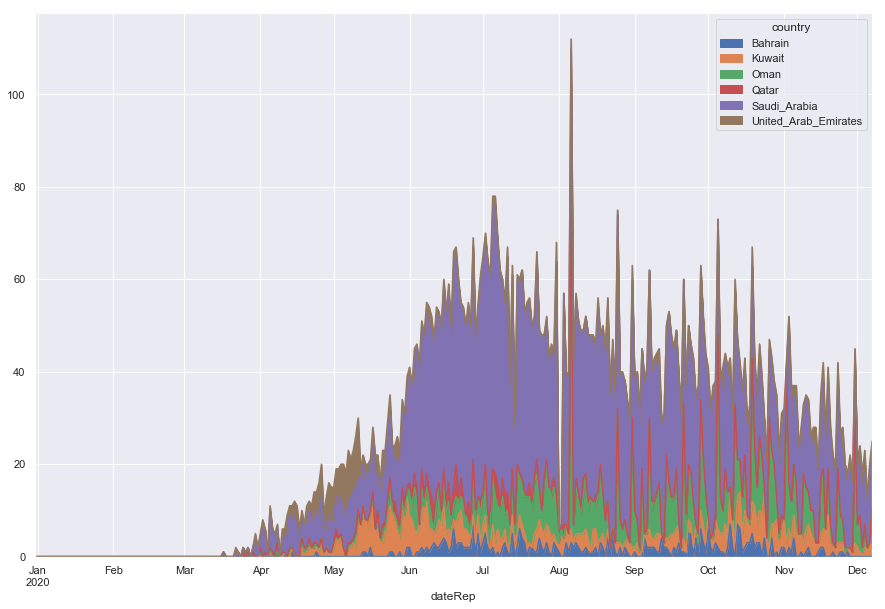

In [77]:
gulf.pivot("dateRep", "country", "deaths").plot.area(figsize=(15,10));

The above graph indicates the highest peak of the number of cases in June until July, around 8000 cases each day when the number of cases starts to decline with a flat number of cases in the last months in around 4000 cases with a negative trend down to 3000 cases.
The difference between the number of cases and deaths reported indicates the peak of deaths is in August with more than 100 deaths reported, although the number of deaths in the months with the highest number is around 80 deaths per day. There is also a negative trend in deaths reported down to 20 deaths in the current month. 

In [8]:
COVID19.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,60409.000000,60409.000000,60409.000000,60409.000000,60409.000000,6.029300e+04,57537.000000
mean,15.743300,6.945405,2019.998891,1106.989306,25.440828,4.110602e+07,63.173547
std,8.914101,2.886310,0.033285,6398.522523,128.892744,1.534242e+08,156.396270
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.324820e+06,0.708613
50%,16.000000,7.000000,2020.000000,15.000000,0.000000,7.813207e+06,6.540355
75%,23.000000,9.000000,2020.000000,258.000000,4.000000,2.860872e+07,49.917097
max,31.000000,12.000000,2020.000000,231930.000000,4928.000000,1.433784e+09,1900.836210


In [9]:
COVID19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60409 entries, 0 to 60408
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     60409 non-null  datetime64[ns]
 1   day                                                         60409 non-null  int64         
 2   month                                                       60409 non-null  int64         
 3   year                                                        60409 non-null  int64         
 4   cases                                                       60409 non-null  int64         
 5   deaths                                                      60409 non-null  int64         
 6   countriesAndTerritories                                     60409 non-null  object        
 7   geoId                 

In [12]:
COVID19[COVID19.Continent.isin(['Asia'])]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,country,countryterritoryCode,popData2019,Continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-07,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
1,2020-12-06,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
2,2020-12-05,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865
3,2020-12-04,4,12,2020,119,5,Afghanistan,AF,AFG,38041757.0,Asia,7.107979
4,2020-12-03,3,12,2020,202,19,Afghanistan,AF,AFG,38041757.0,Asia,7.536455
...,...,...,...,...,...,...,...,...,...,...,...,...
59878,2020-04-14,14,4,2020,0,0,Yemen,YE,YEM,29161922.0,Asia,NaN
59879,2020-04-13,13,4,2020,0,0,Yemen,YE,YEM,29161922.0,Asia,NaN
59880,2020-04-12,12,4,2020,0,0,Yemen,YE,YEM,29161922.0,Asia,NaN
59881,2020-04-11,11,4,2020,0,0,Yemen,YE,YEM,29161922.0,Asia,NaN


In [13]:
#a-Construct charts and tables for the Arabian gulf countries cases and deaths
a=COVID19.loc[:,['dateRep','cases','deaths','country','Continent']]
a

,dateRep,cases,deaths,country,Continent
0,2020-12-07,210,26,AF,Asia
1,2020-12-06,234,10,AF,Asia
2,2020-12-05,235,18,AF,Asia
3,2020-12-04,119,5,AF,Asia
4,2020-12-03,202,19,AF,Asia
...,...,...,...,...,...
60404,2020-03-25,0,0,ZW,Africa
60405,2020-03-24,0,1,ZW,Africa
60406,2020-03-23,0,0,ZW,Africa
60407,2020-03-22,1,0,ZW,Africa


In [14]:

a=COVID19.loc[:,['dateRep','cases','deaths','country','Continent']]
b=a.loc[a['country'].isin(['BH', 'SA', 'AE','KW','QA','OM'])]   
b

,dateRep,cases,deaths,country,Continent
4151,2020-12-07,198,0,BH,Asia
4152,2020-12-06,132,0,BH,Asia
4153,2020-12-05,168,0,BH,Asia
4154,2020-12-04,162,0,BH,Asia
4155,2020-12-03,133,0,BH,Asia
...,...,...,...,...,...
56980,2020-01-04,0,0,AE,Asia
56981,2020-01-03,0,0,AE,Asia
56982,2020-01-02,0,0,AE,Asia
56983,2020-01-01,0,0,AE,Asia


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'the Arabian gulf countries cases '}, xlabel='country', ylabel='cases'>

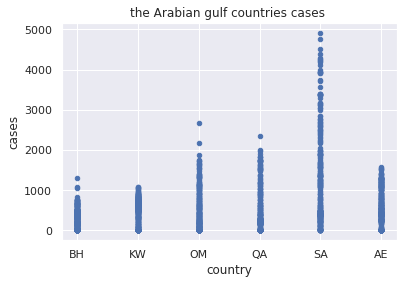

In [15]:
#first chart for the Arabian gulf countries cases:
b.plot.scatter(x='country', y='cases', title='the Arabian gulf countries cases ')


## Distribution of Covid-19 Case in the Arabian Gulf Countries

_In our analysis, we want to look at the number of cases in the Arabic countries : The logic says countries with large Corona cases shall expect a large death cases._

_Based on the above chart there is a high distribution of Covid-19 cases in the Saudi Arabia comparing to the other Arab Gulf Countries, the loweset distribution can been seen clearly in Kwait and Bahrain. That makes a sense since Saudi Arabia has more population(33,7 millions in 2018) comparing to Kwait which had only 4,137 in 2018._

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'the Arabian gulf countries  deaths'}, xlabel='country', ylabel='deaths'>

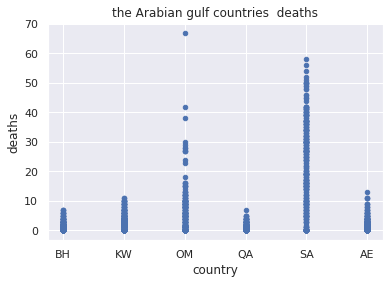

In [16]:
#second chart for the Arabian gulf countries deaths:

b.plot.scatter(x='country', y='deaths', title='the Arabian gulf countries  deaths')
#we can see both of charts saudi arabia take the highst cases and deaths then OMan

_The below bar plot, shows the mean of the cases caused by Corona virus in 2020, SA has a mean of Corona case bigger than 1200, the OM, KW, AE, BH and QA have a mean of Corona cases lower than 500._
_Note: We mean by Corona case every person got a positive Corona test._

<AxesSubplot:xlabel='country'>

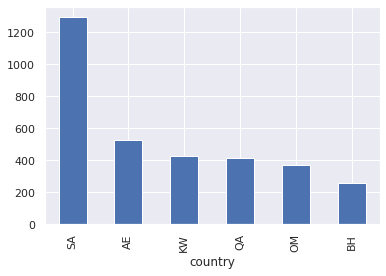

In [17]:
b.groupby("country").cases.mean().sort_values(ascending=False)[:6].plot.bar()


## Distribution of Deaths of Covid-19 in the Arabian Gulf Countries

_As we expected in the previous section, the higher cases can lead to a higher number of deaths, clearly we can see that the Saudi Arabia has the highest distribution of deaths comparing to the other Arab countries._

_The below bar plot, shows the mean of the deaths caused by Corona virus in 2020, SA has a mean of deaths bigger than 20, the OM, KW, AE, BH and QA have a mean of deaths lower than 5._

<AxesSubplot:xlabel='country'>

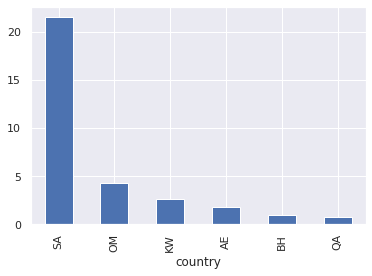

In [18]:
#more charts:
b.groupby("country").deaths.mean().sort_values(ascending=False)[:6].plot.bar()


## ANOVA test

_An ANOVA test is An Analysis of Variance Test,it is t-statistic test for more than 2 groups. It is used to study the means of a conditionamong many groups._

_We use the one-way approach to determine if there are any statistically significant differences between the means of three or more groups_

In [539]:
#First I used two modules:
# Approach 1 : One-Way ANOVA Test using statsmodels module

In [540]:
stats.f_oneway(
             district_dict['BH'], district_dict['SA'], \
             district_dict['AE'], district_dict['KW'], \DD
             district_dict['QA'] ,district_dict['OM']
)

F_onewayResult(statistic=115.96097896464082, pvalue=1.1774799162522678e-107)

In [543]:
districts = ['BH', 'SA', 'AE', 'KW', 'QA','OM']

ss_b = 0
for d in districts:
    ss_b += district_dict[d].shape[0] * \
            np.sum((district_dict[d].mean() - COVID19['cases'].mean())**2)

ss_w = 0
for d in districts:
    ss_w += np.sum((district_dict[d] - district_dict[d].mean())**2)

msb = ss_b/4
msw = ss_w/(len(COVID19)-5)
f=msb/msw
print('F_statistic: {}'.format(f))

F_statistic: 145.02495271073775


In [544]:
ss_t = np.sum((COVID19['cases']-COVID19['cases'].mean())**2)        
eta_squared = ss_b/ss_t
print('eta_squared: {}'.format(eta_squared))

eta_squared: 0.22774914762801138


In [545]:
 #the effect size for this ANOVA test would be "Large".

In [546]:
#Approach 2: One-Way ANOVA Test using OLS Model
#the approach i followed in Linear Regression.

In [547]:
model = ols('cases ~ C(country)', COVID19).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  cases   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Tue, 29 Dec 2020   Prob (F-statistic):          1.18e-107
Time:                        16:09:45   Log-Likelihood:                -15390.
No. Observations:                1972   AIC:                         3.079e+04
Df Residuals:                    1966   BIC:                         3.082e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          523.5282     32.352     16.182      0.000     460.081     586.976
C(country)[T.BH]  -266.4229     45.585     -5.845      0.000    -355.823    -177.023
C(country)[T.KW]   -98.9135     45.651     -2.167      0.030    -188.444      -9.383
C(country)[T.OM]  -152.9466     45.752     -3.343      0.001    -242.675     -63.218
C(country)[T.QA]  -110.8202     45.685     -2.426      0.015    -200.416     -21.224
C(country)[T.SA]   771.4646     48.166     16.017      0.000     677.002     865.927
==============================================================================
Omnibus:                      687.139   Durbin-Watson:                   0.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3263.688
Skew:                           1.595   Prob(JB):                         0.00
Kurtosis:                       8.436   Cond. No.                         6.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:

#The F-statistic=116.0 From the above output results, we see that the p-value is more than 0.05. Hence, we can reject the Null Hypothesis that there’s a difference among different  groups.


In [548]:
# Seeing if the overall model is significant
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

# Creates the ANOVA table
res = sm.stats.anova_lm(model, typ= 2)
res

Overall model F( 5, 1966) =  115.961, p =  0.0000


,sum_sq,df,F,PR(>F)
C(country),2.045074e+08,5.0,115.960979,1.177480e-107
Residual,6.934427e+08,1966.0,NaN,NaN


In [549]:
#Post Hoc Tests

In [550]:
mc = statsmodels.stats.multicomp.MultiComparison(COVID19['cases'],COVID19['country'])
mc_results = mc.tukeyhsd()
print(mc_results)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
    AE     BH -266.4229  0.001 -396.4533 -136.3925   True
    AE     KW  -98.9135 0.2538 -229.1335   31.3066  False
    AE     OM -152.9466 0.0109 -283.4548  -22.4383   True
    AE     QA -110.8202 0.1477 -241.1358   19.4954  False
    AE     SA  771.4646  0.001  634.0707  908.8584   True
    BH     KW  167.5094 0.0032   37.7683  297.2506   True
    BH     OM  113.4763 0.1273   -16.554  243.5067  False
    BH     QA  155.6027 0.0084   25.7657  285.4397   True
    BH     SA 1037.8875  0.001  900.9475 1174.8275   True
    KW     OM  -54.0331 0.8253 -184.2532   76.1869  False
    KW     QA  -11.9067    0.9 -141.9337  118.1203  False
    KW     SA  870.3781  0.001   733.258 1007.4982   True
    OM     QA   42.1264    0.9  -88.1893   172.442  False
    OM     SA  924.4112  0.001  787.0173  1061.805   True
    QA     SA 

In [ ]:
#Tuckey HSD test clearly says that there’s a significant difference between Group1 – Group2

In [551]:
#Assumption Checks/Model Diagnostics
#Normal Distribution Assumption check

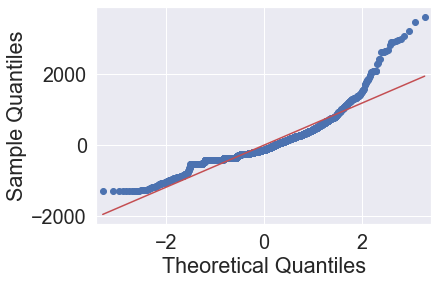

In [552]:
#Method 1: Q-Q plot test:
res = model.resid
fig = sm.qqplot(res, line='s')
plt.show()

In [561]:
#From the above Q-Q plot, we can see that residuals are almost normally distributed (although points at the extreme ends can be discounted). Hence, 
#we can conclude that it satisfies the Normality assumption of the ANOVA test.

In [565]:
#c-Test the independence between the cases and deaths 
contingency_table = pd.crosstab(
    COVID19['cases'],
    COVID19['country'],
    margins = True
)
contingency_table

country,AE,BH,KW,OM,QA,SA,All
cases,,,,,,,
0,59,68,57,114,63,3,364
1,5,4,3,2,2,1,17
2,5,2,4,7,1,1,20
3,1,3,4,1,4,0,13
4,0,1,3,1,0,3,8
...,...,...,...,...,...,...,...
4387,0,0,0,0,0,1,1
4507,0,0,0,0,0,1,1
4757,0,0,0,0,0,1,1


In [568]:
#The Chi-Squared Test for Independence Using Scipy:
f_obs = np.array([contingency_table.iloc[0][0:6].values,
                  contingency_table.iloc[1][0:6].values])
f_obs


array([[ 59,  68,  57, 114,  63,   3],
       [  5,   4,   3,   2,   2,   1]])

In [569]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(8.218398830724393, 0.14460289433482867, 5)

## Interpretation of the ANOVA test

_The one way Anova approach result interpretation: the p-value <0.05. Hence, we can reject the Null Hypothesis. There is enough evidence to conclude that at least one of the district has a different mean in number of cases (F(5,1966)=1966, p <.05). The eta square also suggest that the variability explain by the sample is around 22% accounted by the district.  
Both ANOVA approaches using OLS Model or the statsmodels model reject the null hypothesis._
_Our ANOVA model shows a low R-squared (0.228) but still the model is significant._

Since the model is significant a post hoc Tukey HSD test is conducted to evaluate the difference betweean each pair of district. SA is significant different than all the district, AE is different from all except for the QA. BH is different from KW, and QA. 

The assumptions of the model do not hold, the distribution of the residuals shows that they do not follow the normal distribution, which might be indication of a lack of fit of the model. 

One way ANOVA is a robust technique against normality assumption, however, equality of variance is needed to have confidence on the results, we compare six groups corresponing to countries of the gulf and test for significance statistics by adressing the difference between the mean accounted by the variation within the sample. 


## Correlation between the Covid Cases and the Deaths

_Correlation coefficients quantify the association between variables or features of a dataset, we use the correlation in our Coronavirus report to study the relationship between the cases and the deaths. These statistics are of high importance for understanding this pandemic in the Arab world._

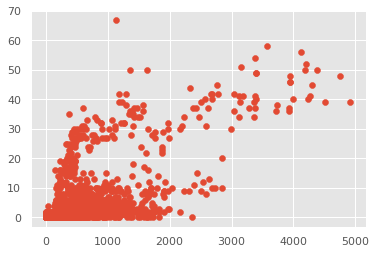

In [31]:
import matplotlib
import matplotlib.pyplot 
%matplotlib inline
matplotlib.style.use('ggplot')
x =b['cases']
y = b['deaths']
matplotlib.pyplot.scatter(x, y)
matplotlib.pyplot.show()

In [43]:
import  matplotlib.pyplot as plt
corr = b.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,cases,deaths
cases,1.000000,0.679136
deaths,0.679136,1.000000


## Interpretation of the Correlation test

_The above graph shows clearly a positive correlation (relationship) between the cases and the deaths for higher number of cases, but no clear relationship is found in lower number of cases, that means when the positive Covid-19 test increase, the death cases increases too._
_The above correlation matrix shows a stregth correlation value of 0.67 between the deaths and the positive Covid-19 cases._

In [5]:
COVID19= pd.read_excel('COVID-19-geographic-disbtribution-worldwide-2020-12-07.xlsx')
COVID19

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-07,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
1,2020-12-06,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
2,2020-12-05,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865
3,2020-12-04,4,12,2020,119,5,Afghanistan,AF,AFG,38041757.0,Asia,7.107979
4,2020-12-03,3,12,2020,202,19,Afghanistan,AF,AFG,38041757.0,Asia,7.536455
...,...,...,...,...,...,...,...,...,...,...,...,...
60404,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
60405,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
60406,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
60407,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [7]:
df_cols = COVID19.columns
df_cols

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

In [17]:
gulf=COVID19.loc[COVID19['geoId'].isin(['BH', 'SA', 'AE','KW','QA','OM'])]
gulf['date_s'] = gulf.dateRep.dt.strftime('%Y%m%d')
# Sort the data frame on date
gulf = gulf.sort_values(by=['date_s'])
gulf

C:\Users\Pastor\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,date_s
56984,2019-12-31,31,12,2019,0,0,United_Arab_Emirates,AE,ARE,9770526.0,Asia,NaN,20191231
42281,2019-12-31,31,12,2019,0,0,Oman,OM,OMN,4974992.0,Asia,NaN,20191231
4492,2019-12-31,31,12,2019,0,0,Bahrain,BH,BHR,1641164.0,Asia,NaN,20191231
31047,2019-12-31,31,12,2019,0,0,Kuwait,KW,KWT,4207077.0,Asia,NaN,20191231
45464,2019-12-31,31,12,2019,0,0,Qatar,QA,QAT,2832071.0,Asia,NaN,20191231
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45126,2020-12-07,7,12,2020,125,0,Qatar,QA,QAT,2832071.0,Asia,94.595086,20201207
47786,2020-12-07,7,12,2020,187,11,Saudi_Arabia,SA,SAU,34268529.0,Asia,10.082137,20201207
41945,2020-12-07,7,12,2020,557,9,Oman,OM,OMN,4974992.0,Asia,56.382000,20201207
30708,2020-12-07,7,12,2020,205,2,Kuwait,KW,KWT,4207077.0,Asia,102.517734,20201207


In [19]:
gulf.loc[gulf.deaths.idxmax(), ['dateRep', 'countriesAndTerritories', 'cases', 'deaths']]

dateRep                    2020-08-06 00:00:00
countriesAndTerritories                   Oman
cases                                     1127
deaths                                      67
Name: 42068, dtype: object

In [20]:
gulf.loc[gulf.cases.idxmax(), ['dateRep', 'countriesAndTerritories', 'cases', 'deaths']]

dateRep                    2020-06-18 00:00:00
countriesAndTerritories           Saudi_Arabia
cases                                     4919
deaths                                      39
Name: 47958, dtype: object

From the gulf countries Oman is the country that reports the highes number of deaths in a single day (August six), in which they also reported 1127 new cases. This is not the highest number of reported cases, Saudi Arabia reports 4919 new cases on June six, in which they also reported 39 deaths. Although we found a linear relationship between deaths and positive cases of COVID-19 there are other factors that might influence the mortality. 

In [39]:
gulf['cummulative'] = gulf['cases'].sum()
gulf['pct_cases'] = (gulf['cases']/gulf['cummulative'])*100
gulf['cummulative_deaths'] = gulf['deaths'].sum()
gulf['rate_deaths_cases'] = (gulf['deaths']/gulf['cases'])*100

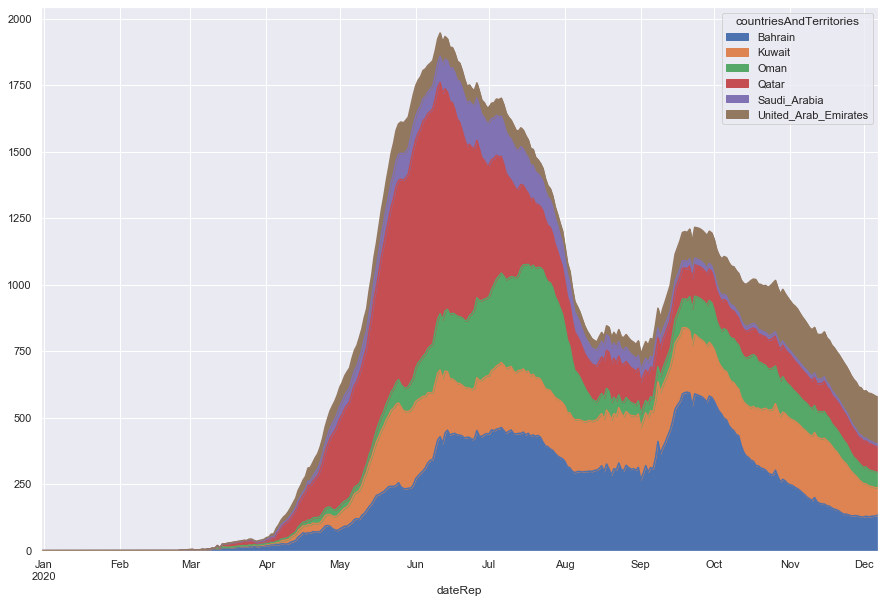

In [25]:
gulf.pivot("dateRep", "countriesAndTerritories", "Cumulative_number_for_14_days_of_COVID-19_cases_per_100000").plot.area(figsize=(15,10));

The results for cases per population shows that Qatar and Bahrain has the highest rate per 100,000 people, while Saudi Arabia and United Arab Emirates has the lowest rate per 100,000. This might be a more realibale measure

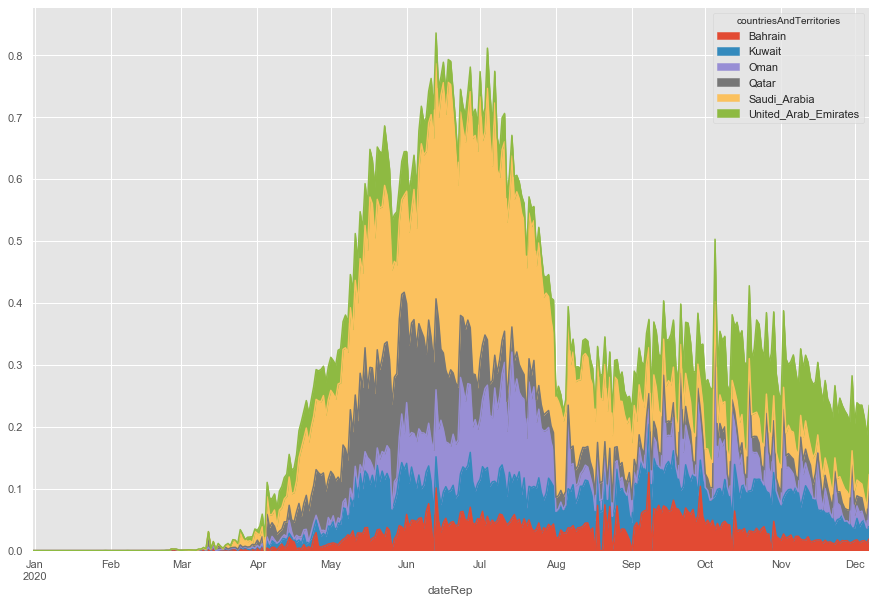

In [31]:
gulf.pivot("dateRep", "countriesAndTerritories", "pct_cases").plot.area(figsize=(15,10));

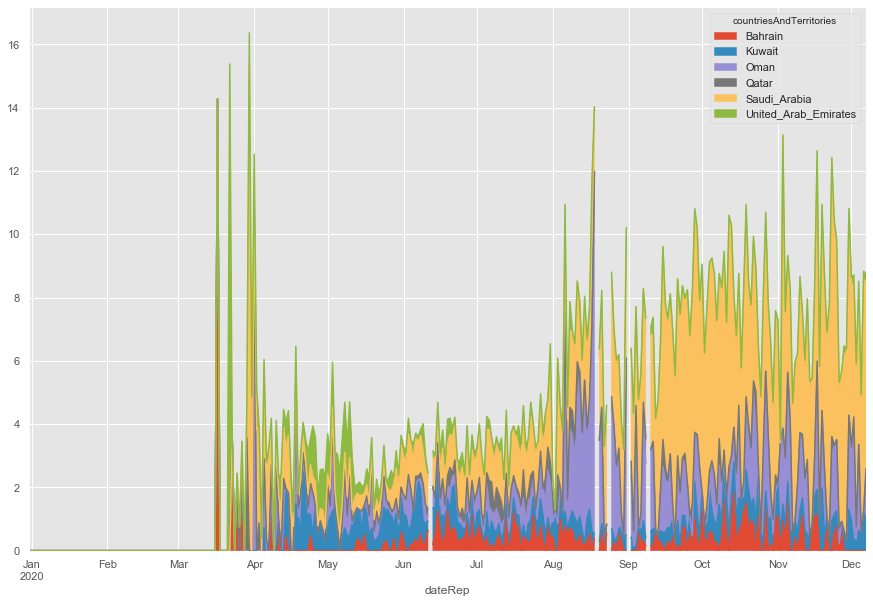

In [40]:
gulf.pivot("dateRep", "countriesAndTerritories", "rate_deaths_cases").plot.area(figsize=(15,10));

The above graph results indicate that Saudi Arabia accounts for the highest percent of the cases of the gulf countries; this corresponds with the relative number of all deaths, in which Saudi Arabia accounts for the highest percentage of all deaths in the region. A different history might be identified when using the ratio between deaths and new cases. Oman has the highest rate in August and September; after that period, Saudi Arabia shows the highest increase in this ratio. 

## Conclusion

Covid-19 data is useful to identify patterns that might give you a hint about what we are seeing and what we could expect; beyond the number of new cases, a different approach might be taken when additional measures are used, the mean number of cases shows differents between the region that might be accounted by the population size, the mortality, on the other hand, can be seen from different angles. In this research, we identify Saudi Arabia has the most deficient performance in terms of new cases and mortality. However, Oman shows a significant impact on mortality in August. 
Further analysis needs to be done, time series analysis to evaluate the spread's trend, and predictive techniques might help identify where the spread is going and what actions might be taken. 